# SparseInst Demo

### Run demo with command line format


In [ ]:
os.chdir('/content/SparseInst')
!python demo.py --config-file configs/sparse_inst_r50vd_giam_aug.yaml --input ../_val2017_part/* --output results --opt MODEL.WEIGHTS sparse_inst_r50vd_giam_aug_8bc5b3.pth INPUT.MIN_SIZE_TEST 512

### Run with cell

In [ ]:
# FILE TREE

# SparseInst
#   | -- detectron2
#   | -- spareseinst
#   | -- README.md
#   | -- SparseInst.ipynb
#   | ....

In [7]:
import os
import time
import cv2
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt                        

from detectron2.config import get_cfg
from detectron2.data.detection_utils import read_image
from detectron2.utils.logger import setup_logger

from sparseinst import VisualizationDemo, add_sparse_inst_config

%matplotlib inline

In [42]:
class parser():
    def __init__(self, 
                 image_path=None, 
                 output_dir='/content/SparseInst/results/'):
        # reset to your own model-config-file path
        self.config_file = '/content/SparseInst/configs/sparse_inst_r50vd_giam_aug.yaml'

        self.opts = ["MODEL.WEIGHTS", 
                     # reset to your own model.pth path
                     "/content/SparseInst/sparse_inst_r50vd_giam_aug_8bc5b3.pth",
                     "INPUT.MIN_SIZE_TEST", 
                     512]

        self.input = image_path

        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        self.output = output_dir

        # reset to your desired threshold
        self.confidence_threshold = 0.3

        self.sparseinst_mask_threshold = 0.1


def _setup_cfg(args):
    cfg = get_cfg()
    add_sparse_inst_config(cfg)

    cfg.merge_from_file(args.config_file)
    cfg.merge_from_list(args.opts)

    cfg.MODEL.RETINANET.SCORE_THRESH_TEST = args.confidence_threshold
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = args.confidence_threshold
    cfg.MODEL.PANOPTIC_FPN.COMBINE.INSTANCES_CONFIDENCE_THRESH = args.confidence_threshold
    cfg.MODEL.SPARSE_INST.MASK_THRESHOLD = args.sparseinst_mask_threshold

    cfg.freeze()
    return cfg

args = parser('/content/val2017/000000003934.jpg')
cfg = _setup_cfg(args)

demo = VisualizationDemo(cfg)

#### demo: image from local

In [39]:
# run the cell
# change the image path to your own
image_path = "/content/drive/MyDrive/SparseInst_Colab/569021651119418_.pic_hd.jpg"
args.input = image_path

img = read_image(image_path, format="RGB")
start_time = time.time()
predictions, visualized_output = demo.run_on_image(
                                img, args.confidence_threshold)

print("\n{}: {} in {:.2f}s".format(image_path,
                                "detected {} instances".format(
                                    len(predictions["instances"]))
                                    if "instances" in predictions
                                    else "finished",
                                time.time() - start_time,
                                ))

/content/SparseInst/detectron2/detectron2/structures/image_list.py:114: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride



/content/drive/MyDrive/SparseInst_Colab/569021651119418_.pic_hd.jpg: detected 46 instances in 0.66s
/content/SparseInst/results/569021651119418_.pic_hd.jpg


#### demo: image from web/url

In [43]:
# run the cell
# change the image url to your own
img_src = "http://n1image.hjfile.cn/shetuan/2017-05-17-1495016837-986-732.jpg"
url_img = io.imread(img_src)

start_time = time.time()
predictions, visualized_output = demo.run_on_image(
                                url_img, args.confidence_threshold)

print("\n{}: {} in {:.2f}s".format(img_src,
                                "detected {} instances".format(
                                    len(predictions["instances"]))
                                    if "instances" in predictions
                                    else "finished",
                                time.time() - start_time,
                                ))


http://n1image.hjfile.cn/shetuan/2017-05-17-1495016837-986-732.jpg: detected 1 instances in 0.18s
/content/SparseInst/results/2017-05-17-1495016837-986-732.jpg


/content/SparseInst/detectron2/detectron2/structures/image_list.py:114: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


In [ ]:
# save result image
out_filename = os.path.join(
                        args.output, os.path.basename(image_path))
print(out_filename)
visualized_output.save(out_filename)

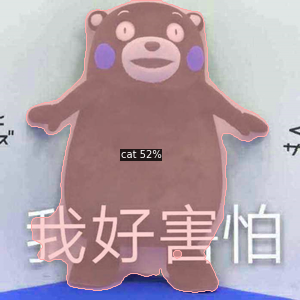

In [44]:
# show result image
result_img =  visualized_output.get_image()[:, :, ::-1]
result_img = Image.fromarray(result_img.astype('uint8')).convert('RGB')

result_img